## Центральная предельная теорема

In [38]:
import pandas as pd
import numpy as np
from numpy import sum
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import laplace
%matplotlib inline

Распределение Лапласа с параметром 2 и строим для него гистограмму и теоретическую плотность распределения на графике ниже.

Ссылка на статью в wiki: https://ru.wikipedia.org/wiki/Распределение_Лапласа

Ниже приведем формулу плотности распределения:

$$ f(x) = \frac\alpha2 e^{-\alpha |x-\beta|} $$

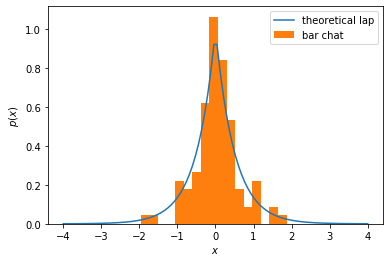

In [69]:
alfa = 2
beta = 0

# Cтроим теоретическую плотность распределения
def density_lap(x):
    return alfa/2*np.exp(-alfa*abs(x))
x = np.linspace(-4, 4, 100)
y = density_lap(x)
plt.plot(x, y, label='theoretical lap')

# Cтроим гистограмму выборки
lap_rv = laplace(beta, 1/alfa)
sam = lap_rv.rvs(100)
plt.hist(sam, density=True,  bins = 17, label='bar chat')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

## Информация о распределении
### Матожидание и дисперсия исходного распределения
Математические ожидание: $$ \beta $$
Дисперсия: $$ 2/\alpha^{2} $$
### Матожидание и дисперсия средневыборочных
Математическое ожидание: $$ \beta $$
Дисперсия: $$ \frac {2/\alpha^{2}} n $$
Параметры нормального распределения ЦПТ зависят от n только в одном месте. Для удобства проверки, рассчитаем значения и выведем их в одной ячейке

In [68]:
# Исходные параметры
lap_vol0 = beta
disp0 = 2/alfa/alfa
print(' Исходное математическое ожидание', lap_vol0, '\n', "Исходная дисперсия ", disp0, '\n')

# Параметры средневыборочного
lap_vol = lap_vol0
def disp(n):
    return disp0/n
print(' Математическое ожидание средневыборочного', lap_vol, '\n', "Дисперсия средневыборочного для: \n")
for i in range(4):
    print(' n = ', 5**(i+1), ': ', disp(5**(i+1)))


 Исходное математическое ожидание 0 
 Исходная дисперсия  0.5 

 Математическое ожидание средневыборочного 0 
 Дисперсия средневыборочного для: 

 n =  5 :  0.1
 n =  25 :  0.02
 n =  125 :  0.004
 n =  625 :  0.0008


## Перейдeм к проверке теоремы

Для n = 5


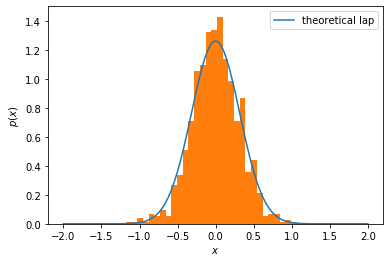

In [75]:
def get_pull(n):
    pull = []
    for i in range(1000):
        lap_rv = laplace(beta, 1/alfa)
        sam0 = lap_rv.rvs(n)
        pull.append(sum(sam0)/n)
    return np.array(pull)

norm = sts.norm(lap_vol, (disp0/5)**(0.5))
x = np.linspace(-2,2,100)
y = norm.pdf(x)
plt.plot(x, y, label='theoretical lap')

pull = get_pull(5)
plt.hist(pull, density=True,  bins = 30)

print('Для n = 5')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

Для n = 25


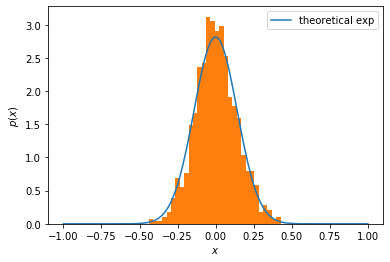

In [80]:
norm = sts.norm(lap_vol, (disp0/25)**(0.5))
x = np.linspace(-1,1,100)
y = norm.pdf(x)
plt.plot(x, y, label='theoretical exp')

pull = get_pull(25)
plt.hist(pull, density=True,  bins = 30)

print('Для n = 25')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

Для n = 125


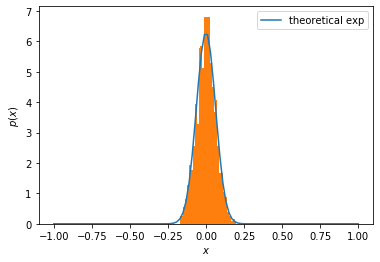

In [78]:
norm = sts.norm(lap_vol, (disp0/125)**(0.5))
x = np.linspace(-1,1,100)
y = norm.pdf(x)
plt.plot(x, y, label='theoretical exp')

pull = get_pull(125)
plt.hist(pull, density=True,  bins = 30)

print('Для n = 125')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

Для n = 625


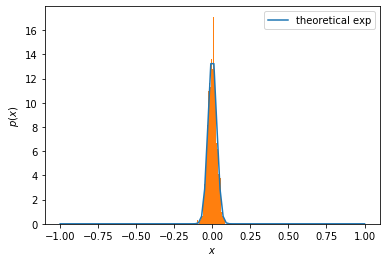

In [82]:
norm = sts.norm(lap_vol, (disp0/625)**(0.5))
x = np.linspace(-1,1,100)
y = norm.pdf(x)
plt.plot(x, y, label='theoretical exp')

pull = get_pull(625)
plt.hist(pull, density=True,  bins = 30)

print('Для n = 625')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

## Заключение
Получены результаты по проверке центральной предельной теоремы для распределения Лапласа.